In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import numpy as np

In [59]:
df = pd.read_csv("linkedin_datascience_jobs.csv")

In [60]:
df

,title,company,location,posted,description,applicants,work_mode,link
0,Consultor Performance Negócios (Cientista / Da...,SulAmérica,"São Paulo, SP",Há 4 dias,DescriçãoResponsável por centralizar todos os ...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
1,Cientista de Dados Senior,CSU Digital,"Barueri, SP",Há 1 mês,O profissional irá trabalhar com um time multi...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
2,Data Scientist | Marketing Analytics,DP6,"São Paulo, SP",Há 6 dias,Nós somos a DP6!Otimizamos a eficiência do Mar...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
3,Banco de Talentos - Profissionais com Deficiência,Cognizant,São Paulo e Região,Há 5 dias,A Cognizant está sempre à procura de grandes t...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
4,Gestor de Tráfego Sênior,V4 Company,"São Paulo, SP",Há 4 dias,🚀 Faça parte da maior unidade da Rede V4 Compa...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
5,Cientista de Dados Jr. - TI - Data & Analytics...,Alares Internet,"São Paulo, SP",Há 1 mês,"Você é curioso(a), apaixonado(a) por dados e q...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
6,Cientista de Dados JR,Mitsui Sumitomo Seguros,"São Paulo, SP",Há 3 semanas,DESCRIÇÃOPrincipais AtividadesApoiar na extraç...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
7,Cientista de Dados - Júnior,IBM,"São Paulo, SP",Há 2 semanas,IntroductionIn this role you will join IBM Con...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
8,Cientista de Dados JR,Mitsui Sumitomo Seguros,São Paulo e Região,Há 3 semanas,"Principais AtividadesApoiar na extração, trata...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
9,Pessoa Cientista de Dados - Vaga afirmativa pa...,Artefact,"São Paulo, SP",Há 6 horas,"A abertura atual é para a Artefact do Brasil, ...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...


In [61]:
# Criar coluna com o texto combinado
df["titulo_descr"] = df["title"].fillna("") + " " + df["description"].fillna("")

In [62]:
df["titulo_descr"].head()

0    Consultor Performance Negócios (Cientista / Da...
1    Cientista de Dados Senior O profissional irá t...
2    Data Scientist | Marketing Analytics Nós somos...
3    Banco de Talentos - Profissionais com Deficiên...
4    Gestor de Tráfego Sênior 🚀 Faça parte da maior...
Name: titulo_descr, dtype: object

In [66]:
nltk.download('stopwords')

stopwords_pt = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [67]:

vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words=stopwords_pt,
    ngram_range=(1, 2),
    lowercase=True
)

In [68]:
X = vectorizer.fit_transform(df["titulo_descr"])

In [69]:
n_clusters = 5  

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)

# Atribui os clusters ao DataFrame
df["cluster"] = kmeans.labels_

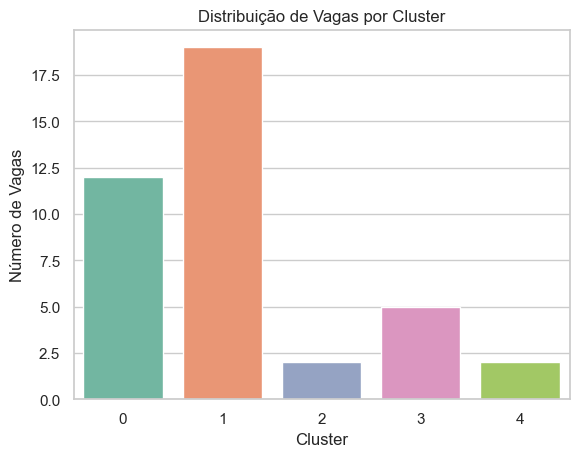

In [70]:
sns.countplot(x="cluster", data=df, palette="Set2")
plt.title("Distribuição de Vagas por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Vagas")
plt.show()

In [71]:
for i in range(n_clusters):
    print(f"\n🔷 Cluster {i}")
    print(df[df["cluster"] == i]["title"].head(3).tolist())


🔷 Cluster 0
['Cientista de Dados Sênior', 'Cientista de Dados Pleno', 'Cientista de Dados SR']

🔷 Cluster 1
['Consultor Performance Negócios (Cientista / Dados)', 'Cientista de Dados Senior', 'Cientista de Dados Jr. - TI - Data & Analytics (São Paulo/SP)']

🔷 Cluster 2
['Cientista de Dados JR', 'Cientista de Dados JR']

🔷 Cluster 3
['Data Scientist | Marketing Analytics', 'Gestor de Tráfego Sênior', 'Cientista de Dados - Júnior']

🔷 Cluster 4
['Banco de Talentos - Profissionais com Deficiência', 'Engenheiro de Dados - Trabalho Remoto | REF#259072']


In [73]:
# Obter os nomes das palavras (features) do TF-IDF
terms = vectorizer.get_feature_names_out()

In [74]:
# Para cada cluster, exibir os termos com maior média de TF-IDF
def top_terms_per_cluster(tfidf_matrix, labels, terms, n_terms=10):
    df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
    df_tfidf["cluster"] = labels

    top_terms = {}
    for cluster in sorted(df_tfidf["cluster"].unique()):
        mean_tfidf = df_tfidf[df_tfidf["cluster"] == cluster].mean().drop("cluster")
        top_words = mean_tfidf.sort_values(ascending=False).head(n_terms).index.tolist()
        top_terms[cluster] = top_words
        print(f"\n🔹 Cluster {cluster} - Top termos:")
        print(", ".join(top_words))
    
    return top_terms

In [75]:
top_terms = top_terms_per_cluster(X, df["cluster"], terms)


🔹 Cluster 0 - Top termos:
porto, pessoas, dados, crédito, saúde, clientes, cada, aqui, produtos, parte

🔹 Cluster 1 - Top termos:
dados, modelos, conhecimento, learning, machine, machine learning, experiência, análise, estatística, modelagem

🔹 Cluster 2 - Top termos:
dados, melhoria, tendências, creche, ciência dados, análises, dashboards relatórios, matemática computação, internas, sas

🔹 Cluster 3 - Top termos:
marketing, data, dp6, and, data masters, masters, agent, google, the, ia generativa

🔹 Cluster 4 - Top termos:
talentos, analista, engenheiro dados, engenheiro, cognizant, dados, interesse, oportunidades, anos, trabalhando


### ✅ Análise Inicial dos Clusters
🔹 Cluster 0 — Vagas generalistas/corporativas
Palavras: porto, pessoas, crédito, saúde, clientes, produtos

Interpretação: vagas que parecem ser voltadas a empresas tradicionais (bancos, saúde, crédito), com foco no negócio, não técnico.

🔹 Cluster 1 — Data Science com foco em Machine Learning
Palavras: machine learning, modelos, estatística, modelagem

Interpretação: este é o núcleo "clássico" de cientista de dados, com ênfase em ML, estatística e modelagem.

🔹 Cluster 2 — BI, análise e relatórios
Palavras: dashboards, relatórios, ciência de dados, análises

Interpretação: cluster voltado a analistas de dados/BI, voltado a relatórios, KPIs, talvez usando Power BI/Tableau.

🔹 Cluster 3 — Marketing digital / consultorias
Palavras: marketing, dp6, google, masters, ia generativa

Interpretação: empresas/consultorias focadas em marketing analytics e tecnologias novas (IA generativa), provavelmente mais voltadas à comunicação e produto.

🔹 Cluster 4 — Engenheiros de Dados / Talent Acquisition
Palavras: engenheiro dados, cognizant, oportunidades, talentos

Interpretação: vagas técnicas de engenharia de dados + talvez muitas postagens genéricas de RH/recrutadores.